In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("TermDepoist_Train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.sample(3)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
2129,11365,41,services,married,secondary,no,7509,no,no,unknown,19,jun,575,1,-1,0,unknown,no
7415,26154,56,management,married,tertiary,no,412,no,no,telephone,20,nov,179,6,-1,0,unknown,no
24719,20337,52,admin.,married,secondary,no,7742,no,no,cellular,11,aug,149,3,-1,0,unknown,no


In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

All Datatypes are correct and object datatype will be needed to encode

In [7]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

Checking Target Variable

In [8]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

Since it contains only 2 values yes or no means it is binary classification problem

In [9]:
df['subscribed'].nunique()

2

# Data Vizualization

Checking Null Values

In [10]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Since there is no null value prsent so need to treat null value as all data is provided

Heatmap of Null Values

<AxesSubplot:>

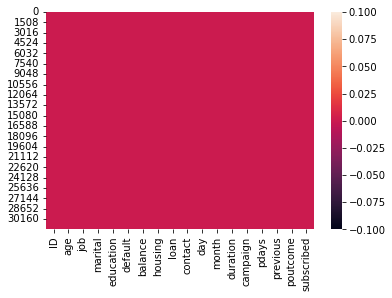

In [11]:
sns.heatmap(df.isnull())

As we know

ID is Ordinal Data (have some relation/sequence) -> Categorical Data

Variables Job, Marital, Education, Default,housing,loan,contact,month,poutcome are Nominal Data(No Relation between Data) -> Categorical Data

Variables Age,Balance,day,duration,campaign,pdays,previous are numerical datatype

Subsribed is Target Variable which is Nominal data.

In [12]:
#Making DataFrame for Nominal Data

In [13]:
df_visualization_nominal=df[['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']].copy()
df_visualization_nominal.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

Visualization of Nominal Data

For Nominal categorical Data we will use countplot as it will give the frequency of the classes of the columns


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


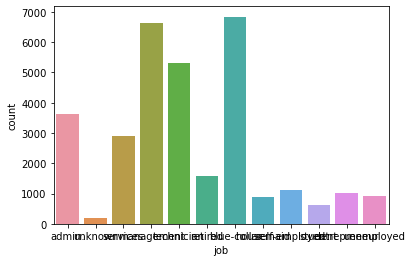

In [14]:
ax=sns.countplot(x='job',data=df_visualization_nominal)
print(df_visualization_nominal['job'].value_counts())

Data shown with no of emloyees working in respective departments

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


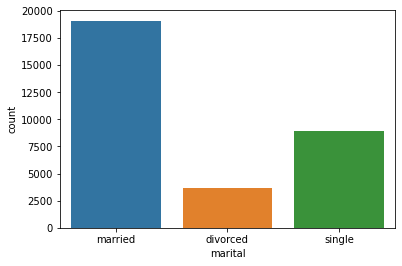

In [16]:
ax=sns.countplot(x='marital',data=df_visualization_nominal)
print(df_visualization_nominal['marital'].value_counts())

Total No of married are 19095, Total Single are 8922 and Total divorced are 3630 people

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


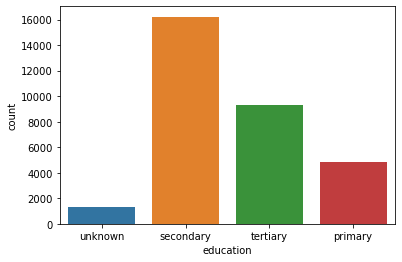

In [17]:
ax=sns.countplot(x='education',data=df_visualization_nominal)
print(df_visualization_nominal['education'].value_counts())

Total No of secondary education are 16224, Total No of tertiary education 9301, Total No of primary education are 4808 and Total No of unknown are 1314

no     31062
yes      585
Name: default, dtype: int64


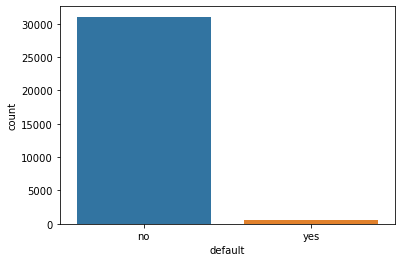

In [18]:
ax=sns.countplot(x='default',data=df_visualization_nominal)
print(df_visualization_nominal['default'].value_counts())

Total deafulters are 31062 and non-defaulters are 585

no     26516
yes     5131
Name: loan, dtype: int64


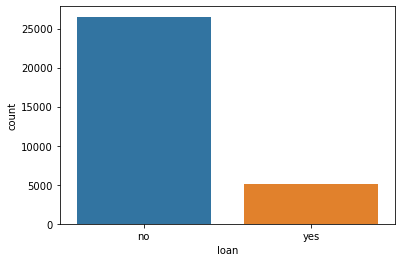

In [19]:
ax=sns.countplot(x='loan',data=df_visualization_nominal)
print(df_visualization_nominal['loan'].value_counts())

Loan taken by 5131 people and not taken by 26516

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


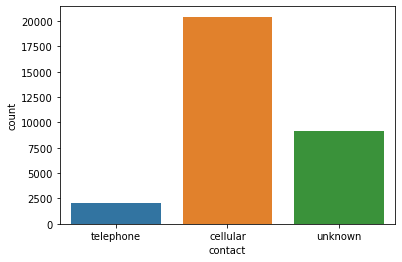

In [20]:
ax=sns.countplot(x='contact',data=df_visualization_nominal)
print(df_visualization_nominal['contact'].value_counts())

20423 were contacted by cellular , 2047 were contacted by telephone and 9177 contacted by unknown source

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


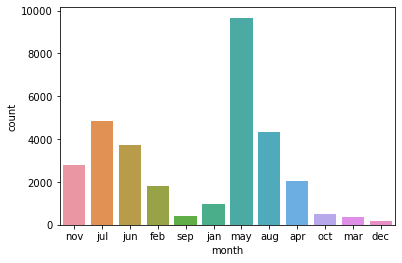

In [21]:
ax=sns.countplot(x='month',data=df_visualization_nominal)
print(df_visualization_nominal['month'].value_counts())

Respected months are shown with no of people

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


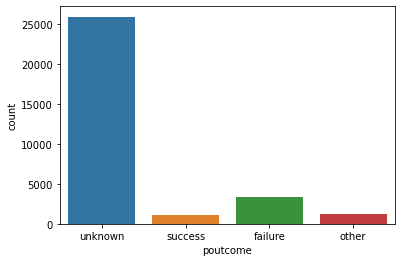

In [22]:
ax=sns.countplot(x='poutcome',data=df_visualization_nominal)
print(df_visualization_nominal['poutcome'].value_counts())

from previous campaign success is 1068, failure is 3362, 25929 are not clear and 1288 are others

no     27932
yes     3715
Name: subscribed, dtype: int64


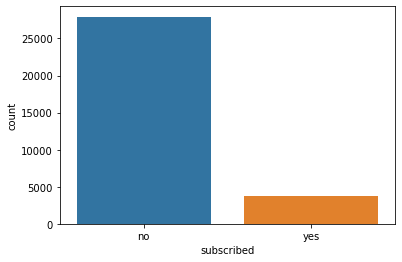

In [23]:
ax=sns.countplot(x='subscribed',data=df_visualization_nominal)
print(df_visualization_nominal['subscribed'].value_counts())

27932 People not subscribed for term deposit and 3715 people subscribed for term deposit

Count Plots plotted for Nominal Data

In [24]:
#Making DataFrame for Ordinal Data

In [25]:
df_visualization_ordinal=df[['ID']].copy()
df_visualization_ordinal.columns

Index(['ID'], dtype='object')

Visualization for ordinal Data - LinePlot

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


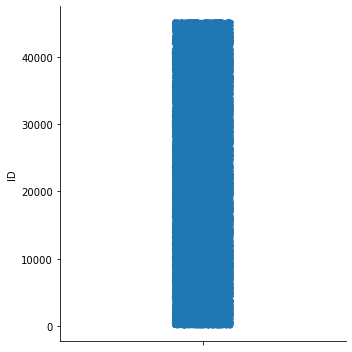

In [26]:
sns.catplot(y='ID',data=df_visualization_ordinal)
print(df_visualization_ordinal['ID'].value_counts())

ID Count Plot shown

# Encoding

As our data has lot of string/object values so convert in numerical data

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [16]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


Now all data present in numerical form so we see statistical summary, first see distribution plots

In [17]:
#Univariate Analysis - Box Plot/Density Plot

<AxesSubplot:>

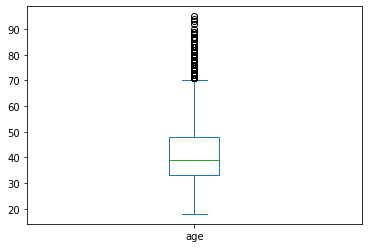

In [18]:
df['age'].plot.box()

Abnormal data present in age between 70-95

<AxesSubplot:xlabel='age', ylabel='Density'>

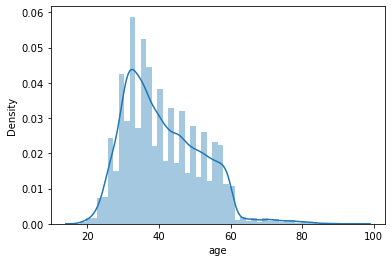

In [31]:
sns.distplot(df['age'])

Age have high Right skewed data

<AxesSubplot:>

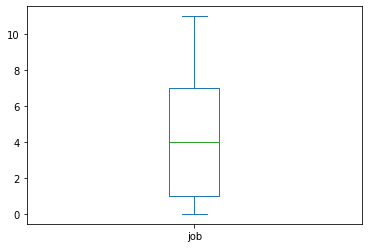

In [32]:
df['job'].plot.box()

No outlier in job means no abnormal data

<AxesSubplot:xlabel='job', ylabel='Density'>

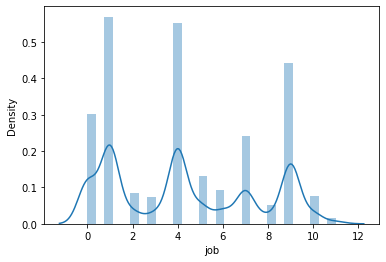

In [33]:
sns.distplot(df['job'])

job has high skewness as very unsymmetrical data

<AxesSubplot:>

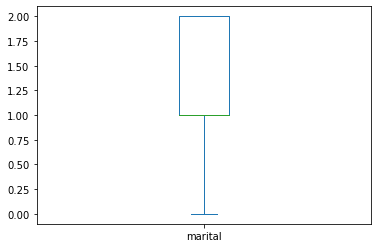

In [34]:
df['marital'].plot.box()

No outlier means no abnormal data in marital

<AxesSubplot:xlabel='marital', ylabel='Density'>

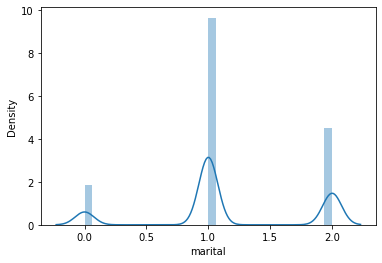

In [35]:
sns.distplot(df['marital'])

Marital has high skewness as very unsymmetrical data

<AxesSubplot:>

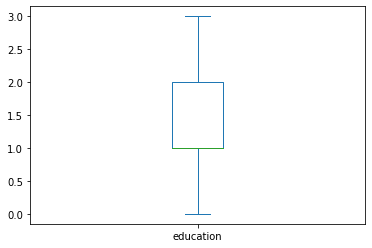

In [36]:
df['education'].plot.box()

<AxesSubplot:xlabel='education', ylabel='Density'>

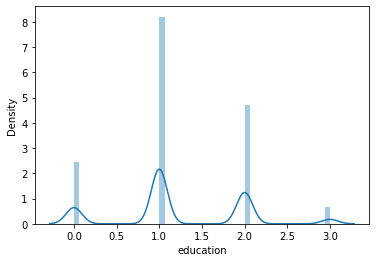

In [37]:
sns.distplot(df['education'])

education has high skewness as very unsymmetrical data

<AxesSubplot:>

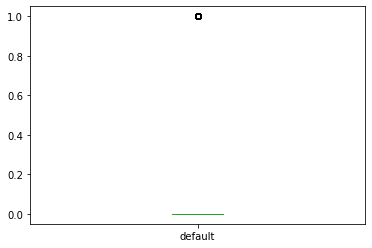

In [38]:
df['default'].plot.box()

Only single value is abnormal in default

<AxesSubplot:xlabel='default', ylabel='Density'>

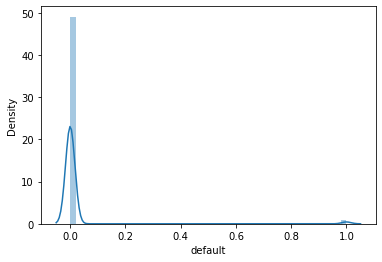

In [39]:
sns.distplot(df['default'])

Default is bell shaped curve so no skewness , normally data distributed

<AxesSubplot:>

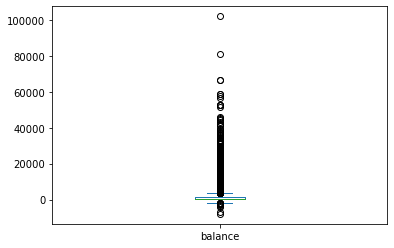

In [40]:
df['balance'].plot.box()

balance has high outliers 

<AxesSubplot:xlabel='balance', ylabel='Density'>

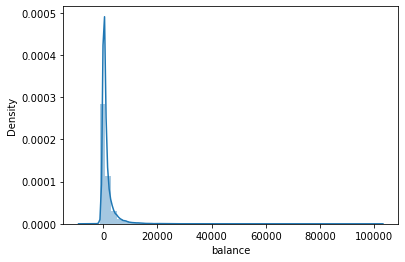

In [41]:
sns.distplot(df['balance'])

Very less skewness in balance as almost normally distributed

<AxesSubplot:>

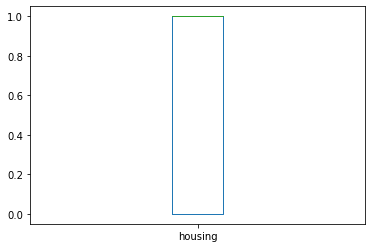

In [42]:
df['housing'].plot.box()

No outlier in housing

<AxesSubplot:xlabel='housing', ylabel='Density'>

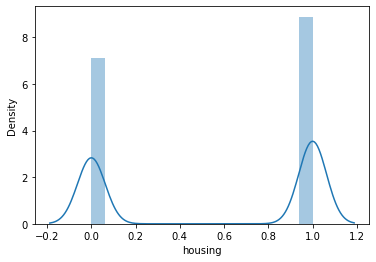

In [43]:
sns.distplot(df['housing'])

data is not symmetrical in housing so skewness is there

<AxesSubplot:>

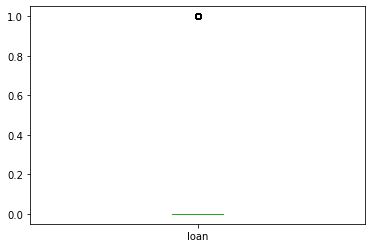

In [44]:
df['loan'].plot.box()

Only one outlier in loan is present at value 1

<AxesSubplot:xlabel='loan', ylabel='Density'>

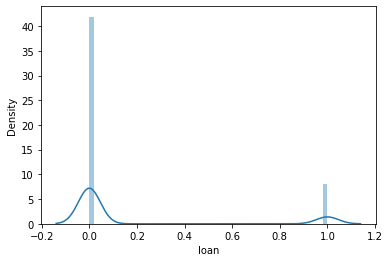

In [45]:
sns.distplot(df['loan'])

Skewness present in loan

<AxesSubplot:>

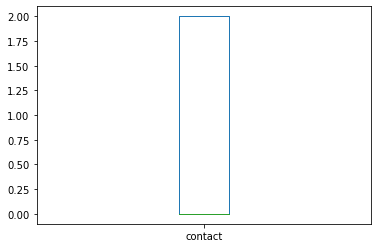

In [46]:
df['contact'].plot.box()

No outlier in contact

<AxesSubplot:xlabel='contact', ylabel='Density'>

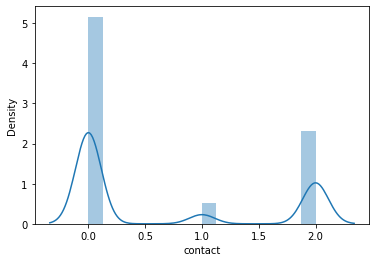

In [47]:
sns.distplot(df['contact'])

<AxesSubplot:>

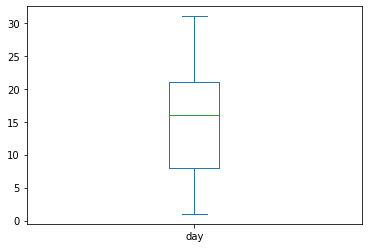

In [48]:
df['day'].plot.box()

No outlier in day

<AxesSubplot:xlabel='day', ylabel='Density'>

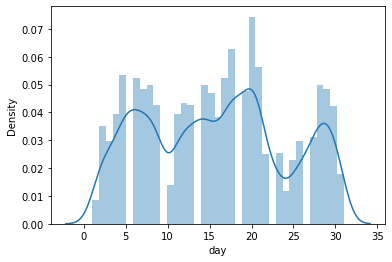

In [49]:
sns.distplot(df['day'])

High Skewness in day

<AxesSubplot:>

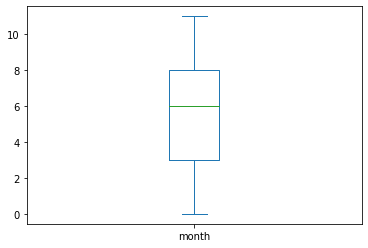

In [50]:
df['month'].plot.box()

No outlier in month

<AxesSubplot:xlabel='month', ylabel='Density'>

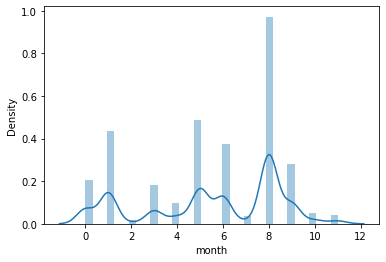

In [51]:
sns.distplot(df['month'])

Month is highly skewed

<AxesSubplot:>

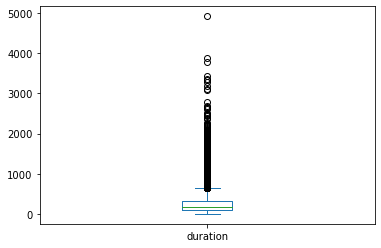

In [52]:
df['duration'].plot.box()

duration has high abnormal data in between 1000-3000

<AxesSubplot:xlabel='duration', ylabel='Density'>

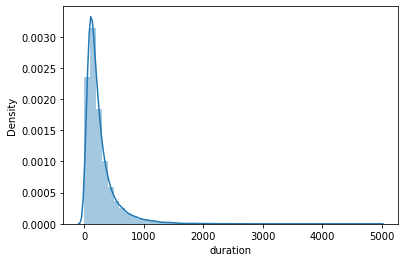

In [53]:
sns.distplot(df['duration'])

duration is slightly right skewed data

<AxesSubplot:>

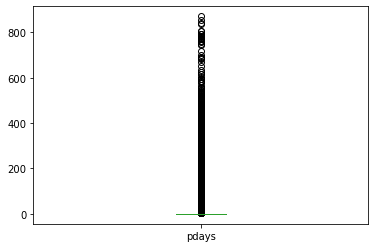

In [54]:
df['pdays'].plot.box()

pdays has very high abnormal data in 0-900

<AxesSubplot:xlabel='pdays', ylabel='Density'>

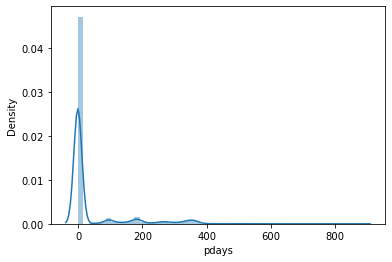

In [55]:
sns.distplot(df['pdays'])

pdays has little right skewness

<AxesSubplot:>

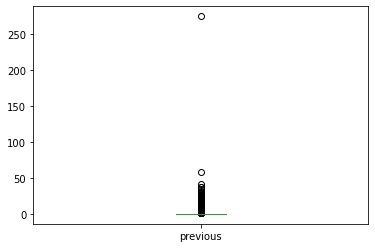

In [56]:
df['previous'].plot.box()

previous has high abnormal data in between 0-50

<AxesSubplot:xlabel='previous', ylabel='Density'>

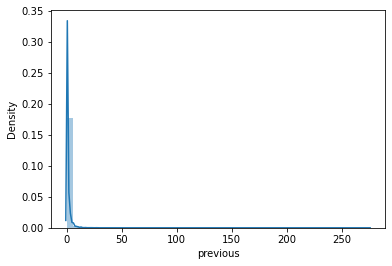

In [57]:
sns.distplot(df['previous'])

previous has skewness as no normal distribution

<AxesSubplot:>

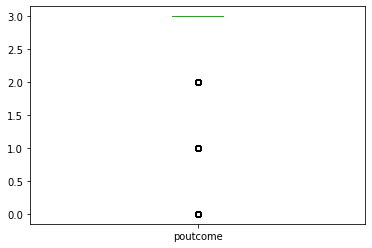

In [58]:
df['poutcome'].plot.box()

poutcome has very less outlier

<AxesSubplot:xlabel='poutcome', ylabel='Density'>

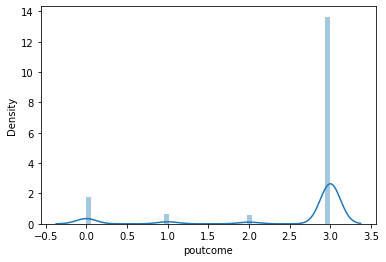

In [59]:
sns.distplot(df['poutcome'])

poutcome is skewed data as unsymmtrical data

<AxesSubplot:>

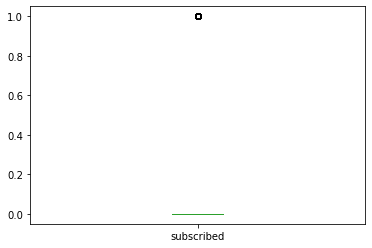

In [60]:
df['subscribed'].plot.box()

subscribed has rare abnormal data , only single value so no outlier present

<AxesSubplot:xlabel='subscribed', ylabel='Density'>

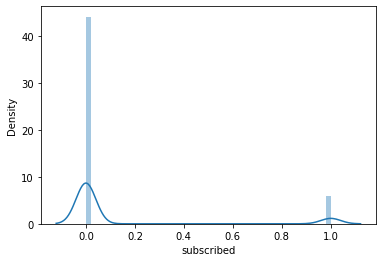

In [61]:
sns.distplot(df['subscribed'])

some skewness is also present in subscribed

In [62]:
#Multivariate Analysis -> Scatter Plot
#Data distribution with target variable 

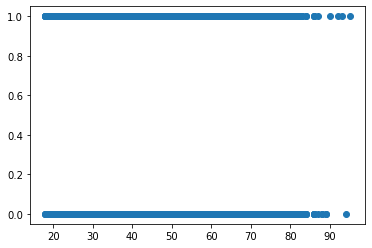

In [63]:
plt.scatter(df['age'],df['subscribed'])

age data mainly present in 20 to 80

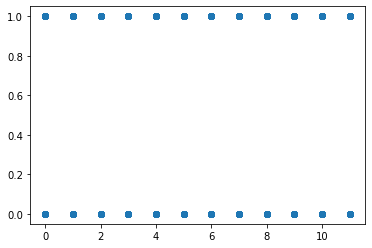

In [64]:
plt.scatter(df['job'],df['subscribed'])

job data is not present continously

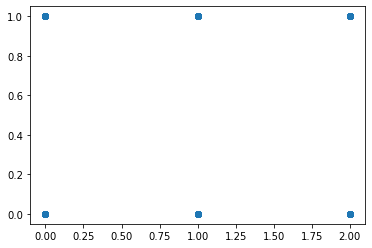

In [65]:
plt.scatter(df['marital'],df['subscribed'])

Data is not distributed properly

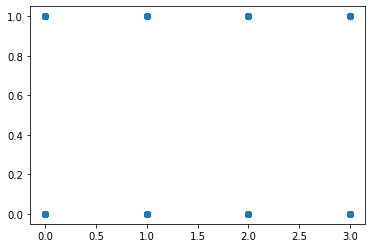

In [66]:
plt.scatter(df['education'],df['subscribed'])

Data is not distributed properly

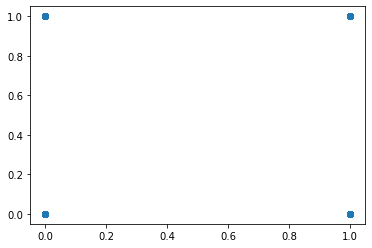

In [67]:
plt.scatter(df['default'],df['subscribed'])

Data is not distributed properly

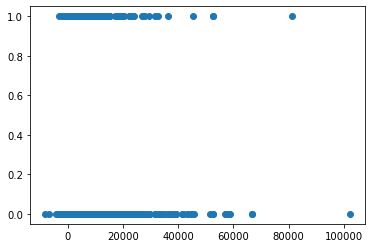

In [68]:
plt.scatter(df['balance'],df['subscribed'])

Data is distributed in 0 to 45000

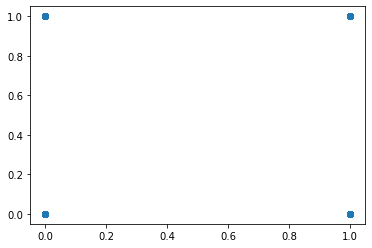

In [69]:
plt.scatter(df['housing'],df['subscribed'])

Data is not distributed properly

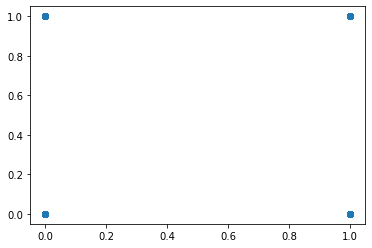

In [70]:
plt.scatter(df['loan'],df['subscribed'])

Data is not distributed properly

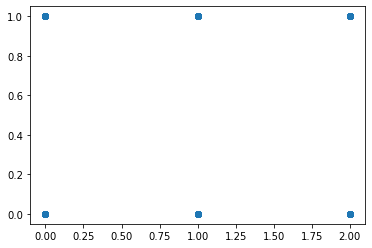

In [71]:
plt.scatter(df['contact'],df['subscribed'])

Data is not distributed properly

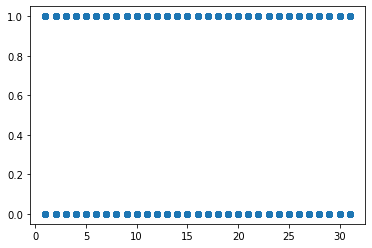

In [72]:
plt.scatter(df['day'],df['subscribed'])

Data is not distributed properly

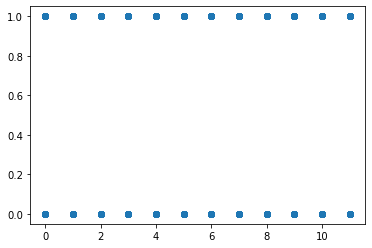

In [73]:
plt.scatter(df['month'],df['subscribed'])

Data is not distributed properly

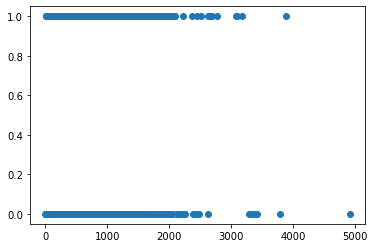

In [74]:
plt.scatter(df['duration'],df['subscribed'])

Data is distributed mainly in 0 to 2000

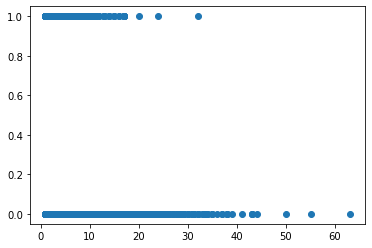

In [75]:
plt.scatter(df['campaign'],df['subscribed'])

Data is distributed mainly in 0 to 40

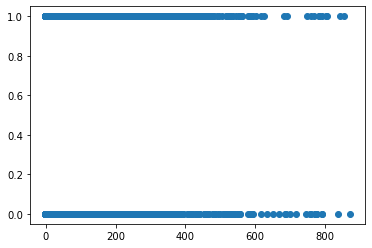

In [76]:
plt.scatter(df['pdays'],df['subscribed'])

Data is distributed mainly in 0 to 800

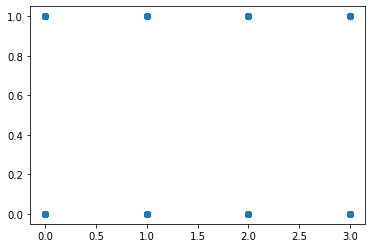

In [77]:
plt.scatter(df['poutcome'],df['subscribed'])

Data is not distributed properly

In [78]:
#Multivariate Analysis

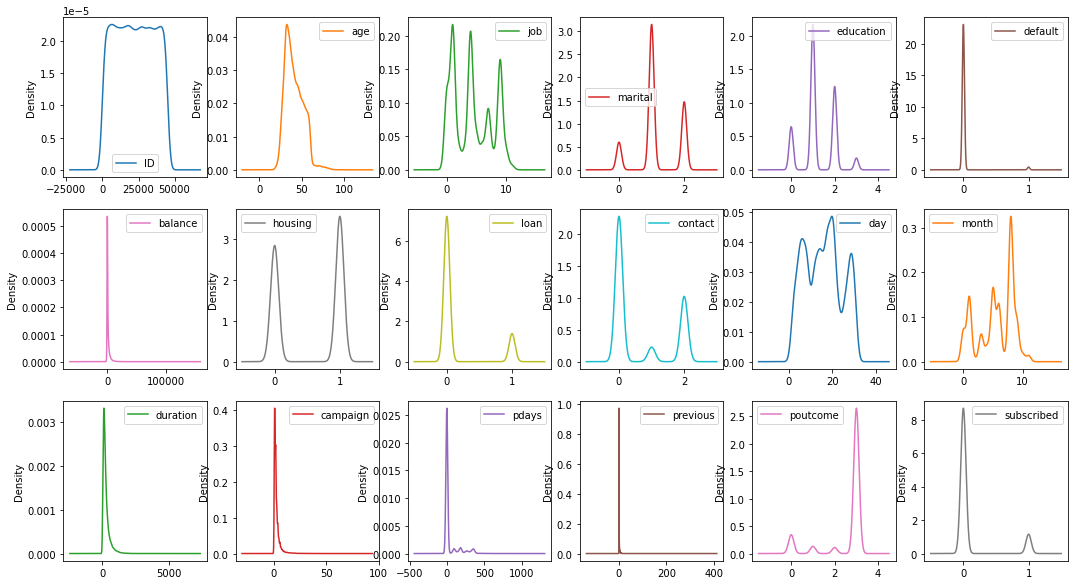

In [79]:
df.plot(kind='density',subplots=True,layout=(3,6),sharex=False,legend=True,figsize=(18,10))
plt.show()

Skewness is present in most columns as most of curves are not normally distributed

# Statistical Summary

In [19]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


Data showing skewness prsent as difference in mean and median 

Data showin outliers present as difference in 75% and max value

In [20]:
#Heatmap of Stats Summary

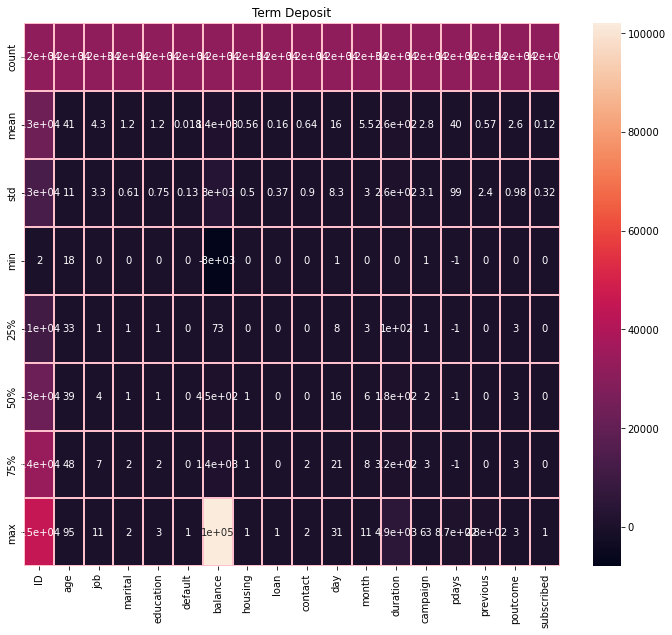

In [21]:
stats_mat=df.describe()
plt.figure(figsize=[12,10])
sns.heatmap(stats_mat,annot=True,linewidth=0.2,linecolor='Pink')
plt.title('Term Deposit')
plt.show()

# Check Correlation

In [22]:
df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


As all columns are not visible so we see trough Heatmap

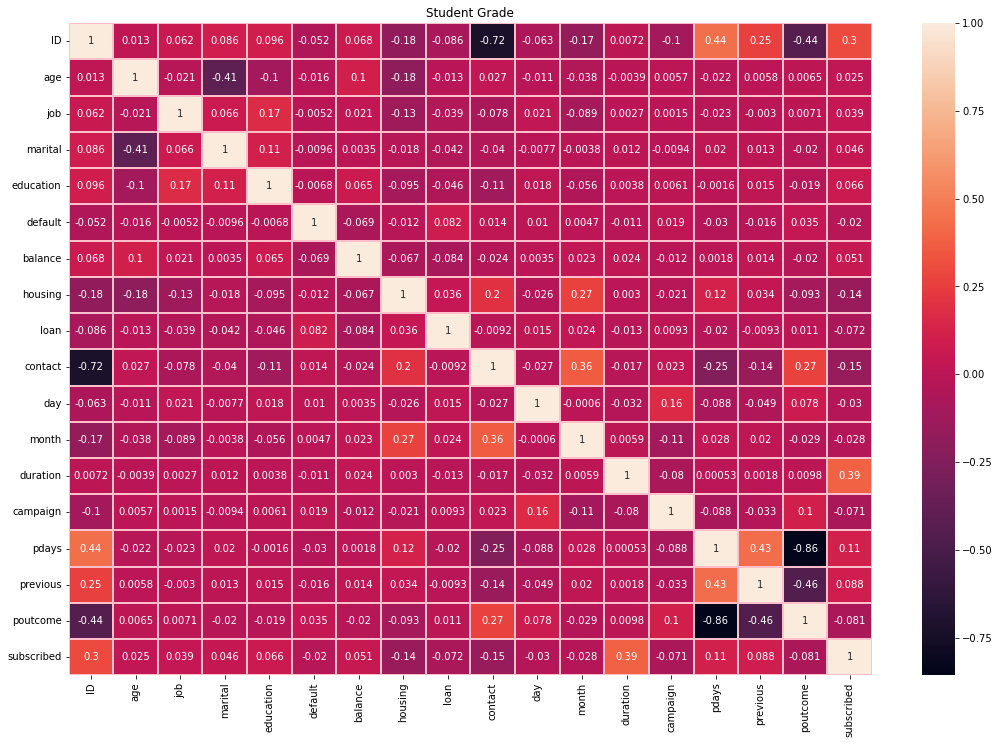

In [23]:
corr_mat=df.corr()
plt.figure(figsize=[18,12])
sns.heatmap(corr_mat,annot=True,linewidth=0.2,linecolor='Pink')
plt.title('Student Grade')
plt.show()

We can see with target variable all columns are very less correlated as value <0.3 but only duration and ID has weak correlation

pdays and poutcome has high correlation wit each other so we will remove poutcome because it is very less correlated to target variable

contact and ID has high correlation wit each other so we will remove contact because it is very less correlated to target variable

In [24]:
df1=df.drop(['poutcome','contact'],axis=1)
df1

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed
0,26110,56,0,1,3,0,1933,0,0,19,9,44,2,-1,0,0
1,40576,31,11,1,1,0,3,0,0,20,5,91,2,-1,0,0
2,15320,27,7,1,1,0,891,1,0,18,5,240,1,-1,0,0
3,43962,57,4,0,2,0,3287,0,0,22,6,867,1,84,3,1
4,29842,31,9,1,1,0,119,1,0,4,3,380,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,12,8,116,2,-1,0,0
31643,40178,53,4,0,2,0,380,0,1,5,6,438,2,-1,0,1
31644,19710,32,4,2,2,0,312,0,0,7,1,37,3,-1,0,0
31645,38556,57,9,1,1,0,225,1,0,15,8,22,7,337,12,0


# Skewness

Preprocessing

Split data into x and y as we don't treat target variable

In [25]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [26]:
x

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,26110,56,0,1,3,0,1933,0,0,19,9,44,2,-1,0
1,40576,31,11,1,1,0,3,0,0,20,5,91,2,-1,0
2,15320,27,7,1,1,0,891,1,0,18,5,240,1,-1,0
3,43962,57,4,0,2,0,3287,0,0,22,6,867,1,84,3
4,29842,31,9,1,1,0,119,1,0,4,3,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,12,8,116,2,-1,0
31643,40178,53,4,0,2,0,380,0,1,5,6,438,2,-1,0
31644,19710,32,4,2,2,0,312,0,0,7,1,37,3,-1,0
31645,38556,57,9,1,1,0,225,1,0,15,8,22,7,337,12


In [27]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

Checking Skewness

In [28]:
x.skew().sort_values(ascending=False)

previous     49.302348
balance       7.995696
default       7.149903
campaign      4.873935
duration      3.199766
pdays         2.642374
loan          1.833474
age           0.681607
job           0.264817
education     0.199441
day           0.087185
ID            0.005851
marital      -0.100071
housing      -0.223918
month        -0.486498
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.35095073,  1.34138189, -1.61003975, ...,  0.135025  ,
        -0.46969565, -0.46967334],
       [ 1.27658532, -0.9663778 ,  1.6528723 , ...,  0.135025  ,
        -0.46969565, -0.46967334],
       [-0.44573069, -1.53815285,  0.8592082 , ..., -1.1092387 ,
        -0.46969565, -0.46967334],
       ...,
       [-0.10616057, -0.83671116,  0.09593561, ...,  0.73858224,
        -0.46969565, -0.46967334],
       [ 1.15412705,  1.40695494,  1.27892758, ...,  1.60920054,
         2.15084394,  2.18608335],
       [-0.54043023,  1.27441963,  0.09593561, ...,  0.135025  ,
        -0.46969565, -0.46967334]])

In [30]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [31]:
x.skew().sort_values(ascending=False)

default      7.149903
loan         1.833474
previous     1.661485
pdays        1.660825
balance      0.821075
campaign     0.230683
duration     0.017331
age          0.008940
education   -0.039618
marital     -0.050323
job         -0.145894
day         -0.159858
housing     -0.223918
ID          -0.290929
month       -0.383709
dtype: float64

Since default and loan are categorical in nature so no mean / median present so no effect of skewness , we not treat it

In [32]:
from sklearn.preprocessing import PowerTransformer 
trans=PowerTransformer(method='yeo-johnson')

In [33]:
x[['pdays','previous','balance']]=trans.fit_transform(x[['pdays','previous','balance']].values)
x.skew().sort_values(ascending=False)

default      7.149903
loan         1.833474
pdays        1.658561
previous     1.658560
campaign     0.230683
duration     0.017331
age          0.008940
education   -0.039618
marital     -0.050323
job         -0.145894
day         -0.159858
housing     -0.223918
ID          -0.290929
month       -0.383709
balance     -3.868969
dtype: float64

# Scaling


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 0.35095073,  1.34138189, -1.61003975, ...,  0.135025  ,
        -0.46985154, -0.46985164],
       [ 1.27658532, -0.9663778 ,  1.6528723 , ...,  0.135025  ,
        -0.46985154, -0.46985164],
       [-0.44573069, -1.53815285,  0.8592082 , ..., -1.1092387 ,
        -0.46985154, -0.46985164],
       ...,
       [-0.10616057, -0.83671116,  0.09593561, ...,  0.73858224,
        -0.46985154, -0.46985164],
       [ 1.15412705,  1.40695494,  1.27892758, ...,  1.60920054,
         2.12901773,  2.12990688],
       [-0.54043023,  1.27441963,  0.09593561, ...,  0.135025  ,
        -0.46985154, -0.46985164]])

In [35]:
x=pd.DataFrame(x1,columns=x.columns)

Multicollinearity Check
VIF Technique

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,0.350951,1.341382,-1.610040,-0.285588,2.196278,-0.137234,0.371079,-1.118201,-0.439893,0.439464,1.190999,-1.443825,0.135025,-0.469852,-0.469852
1,1.276585,-0.966378,1.652872,-0.285588,-0.253707,-0.137234,-0.419204,-1.118201,-0.439893,0.548516,-0.224756,-0.751296,0.135025,-0.469852,-0.469852
2,-0.445731,-1.538153,0.859208,-0.285588,-0.253707,-0.137234,-0.001079,0.894294,-0.439893,0.328737,-0.224756,0.290005,-1.109239,-0.469852,-0.469852
3,1.477866,1.406955,0.095936,-1.895356,1.027984,-0.137234,0.793482,-1.118201,-0.439893,0.762001,0.118284,1.895948,-1.109239,2.127797,2.129700
4,0.601861,-0.966378,1.278928,-0.285588,-0.253707,-0.137234,-0.344299,0.894294,-0.439893,-1.515370,-0.882688,0.833299,-1.109239,-0.469852,-0.469852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.026451,-1.240871,0.095936,1.382363,1.027984,-0.137234,-0.422348,0.894294,-0.439893,-0.378514,0.826908,-0.503544,0.135025,-0.469852,-0.469852
31643,1.252604,1.136104,0.095936,-1.895356,1.027984,-0.137234,-0.214988,-1.118201,2.273280,-1.352488,0.118284,1.008101,0.135025,-0.469852,-0.469852
31644,-0.106161,-0.836711,0.095936,1.382363,1.027984,-0.137234,-0.246556,-1.118201,-0.439893,-1.049546,-1.488997,-1.598288,0.738582,-0.469852,-0.469852
31645,1.154127,1.406955,1.278928,-0.285588,-0.253707,-0.137234,-0.288763,0.894294,-0.439893,-0.014725,0.826908,-2.037314,1.609201,2.129018,2.129907


In [37]:
x.shape

(31647, 15)

In [38]:
x.shape[1]

15

In [39]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

       VIF Factor   features
0        1.466685         ID
1        1.300444        age
2        1.064985        job
3        1.260471    marital
4        1.075771  education
5        1.037003    default
6        1.069755    balance
7        1.195222    housing
8        1.027222       loan
9        1.029072        day
10       1.152392      month
11       1.017493   duration
12       1.075531   campaign
13  653985.511040      pdays
14  653971.599833   previous


Since pdays and previoua has high high vif value as only accepted vif value=5 so drop column one by one

In [40]:
x=x.drop(['pdays'],axis=1)
x

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous
0,0.350951,1.341382,-1.610040,-0.285588,2.196278,-0.137234,0.371079,-1.118201,-0.439893,0.439464,1.190999,-1.443825,0.135025,-0.469852
1,1.276585,-0.966378,1.652872,-0.285588,-0.253707,-0.137234,-0.419204,-1.118201,-0.439893,0.548516,-0.224756,-0.751296,0.135025,-0.469852
2,-0.445731,-1.538153,0.859208,-0.285588,-0.253707,-0.137234,-0.001079,0.894294,-0.439893,0.328737,-0.224756,0.290005,-1.109239,-0.469852
3,1.477866,1.406955,0.095936,-1.895356,1.027984,-0.137234,0.793482,-1.118201,-0.439893,0.762001,0.118284,1.895948,-1.109239,2.129700
4,0.601861,-0.966378,1.278928,-0.285588,-0.253707,-0.137234,-0.344299,0.894294,-0.439893,-1.515370,-0.882688,0.833299,-1.109239,-0.469852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.026451,-1.240871,0.095936,1.382363,1.027984,-0.137234,-0.422348,0.894294,-0.439893,-0.378514,0.826908,-0.503544,0.135025,-0.469852
31643,1.252604,1.136104,0.095936,-1.895356,1.027984,-0.137234,-0.214988,-1.118201,2.273280,-1.352488,0.118284,1.008101,0.135025,-0.469852
31644,-0.106161,-0.836711,0.095936,1.382363,1.027984,-0.137234,-0.246556,-1.118201,-0.439893,-1.049546,-1.488997,-1.598288,0.738582,-0.469852
31645,1.154127,1.406955,1.278928,-0.285588,-0.253707,-0.137234,-0.288763,0.894294,-0.439893,-0.014725,0.826908,-2.037314,1.609201,2.129907


In [41]:
vif_calc()

    VIF Factor   features
0     1.466569         ID
1     1.300071        age
2     1.064957        job
3     1.260444    marital
4     1.075613  education
5     1.036962    default
6     1.069721    balance
7     1.193275    housing
8     1.027222       loan
9     1.029058        day
10    1.152392      month
11    1.017487   duration
12    1.075266   campaign
13    1.360170   previous


Since all vif values less than 5 so no multicollinerity remains now

# Outliers detection

In [42]:
from scipy.stats import zscore
import numpy as np

In [43]:
z=np.abs(zscore(x))
z

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous
0,0.350951,1.341382,1.610040,0.285588,2.196278,0.137234,0.371079,1.118201,0.439893,0.439464,1.190999,1.443825,0.135025,0.469852
1,1.276585,0.966378,1.652872,0.285588,0.253707,0.137234,0.419204,1.118201,0.439893,0.548516,0.224756,0.751296,0.135025,0.469852
2,0.445731,1.538153,0.859208,0.285588,0.253707,0.137234,0.001079,0.894294,0.439893,0.328737,0.224756,0.290005,1.109239,0.469852
3,1.477866,1.406955,0.095936,1.895356,1.027984,0.137234,0.793482,1.118201,0.439893,0.762001,0.118284,1.895948,1.109239,2.129700
4,0.601861,0.966378,1.278928,0.285588,0.253707,0.137234,0.344299,0.894294,0.439893,1.515370,0.882688,0.833299,1.109239,0.469852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.026451,1.240871,0.095936,1.382363,1.027984,0.137234,0.422348,0.894294,0.439893,0.378514,0.826908,0.503544,0.135025,0.469852
31643,1.252604,1.136104,0.095936,1.895356,1.027984,0.137234,0.214988,1.118201,2.273280,1.352488,0.118284,1.008101,0.135025,0.469852
31644,0.106161,0.836711,0.095936,1.382363,1.027984,0.137234,0.246556,1.118201,0.439893,1.049546,1.488997,1.598288,0.738582,0.469852
31645,1.154127,1.406955,1.278928,0.285588,0.253707,0.137234,0.288763,0.894294,0.439893,0.014725,0.826908,2.037314,1.609201,2.129907


In [44]:
threshold=3
print(np.where(z>3))

(array([   10,    26,   109, ..., 31614, 31618, 31646], dtype=int64), array([ 5,  6,  5, ...,  5,  5, 11], dtype=int64))


#Removing outliers from x

In [45]:
df1=df[(z<3).all(axis=1)]
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0


After outliers removal some rows are removed so check data loss :-

In [46]:
# % Data Loss

data_loss=(31647-30417)/31647*100
print(data_loss)

3.886624324580529


Since very much data loss so it is acceptable

# Balancing Target Variable as classification

#Oversampling the data

In [47]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [48]:
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

*Observation Now data is balanced. All values are equal as needed for good accuracy

# Best Random State

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxAccu=0                            #maximum accuracy
maxRS=0                             #best random state for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)                                #fitting the data will train your model
    predrf=dt.predict(x_test)                              #Predicted Target Variable
    acc=accuracy_score(y_test,predrf)
    print('testing accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.9161371162624183 random_state 1
max_accuracy 0.9161371162624183 max_random_state 1
testing accuracy 0.9076344759688535 random_state 2
testing accuracy 0.9093350040275665 random_state 3
testing accuracy 0.9136310749127361 random_state 4
testing accuracy 0.9099615143649871 random_state 5
testing accuracy 0.9059339479101405 random_state 6
testing accuracy 0.9163161192159671 random_state 7
max_accuracy 0.9163161192159671 max_random_state 7
testing accuracy 0.917032131030162 random_state 8
max_accuracy 0.917032131030162 max_random_state 8
testing accuracy 0.9155106059249978 random_state 9
testing accuracy 0.9147945941108029 random_state 10
testing accuracy 0.9134520719591873 random_state 11
testing accuracy 0.9159581133088696 random_state 12
testing accuracy 0.9146155911572541 random_state 13
testing accuracy 0.913362570482413 random_state 14
testing accuracy 0.9127360601449924 random_state 15
testing accuracy 0.9132730690056385 random_state 16
testing accuracy 0.90924550

In [50]:
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.9206121901011367 on Random_state 60


Best Random_State found is 60.We will create our train_test_split using this random_state

# Train_Test Split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=60)

In [52]:
x_train.shape

(44691, 14)

In [53]:
x_test.shape

(11173, 14)

In [54]:
y_train.shape

(44691,)

In [55]:
y_test.shape

(11173,)

Metrics Imported

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score  

# Logistic Regression 

As it is binary classification problem so logistic regression will be used

In [57]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)                               #Testing Accuracy
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 83.57647901190369
[[4626 1036]
 [ 799 4712]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      5662
           1       0.82      0.86      0.84      5511

    accuracy                           0.84     11173
   macro avg       0.84      0.84      0.84     11173
weighted avg       0.84      0.84      0.84     11173



In [58]:
# Cross Validation Score of Logistics Regression

In [59]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=9)
print("Cross Validation Score of Logistic Regression model:-",cr_1.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predlr)-cr_1.mean())

Cross Validation Score of Logistic Regression model:- 0.8394675845187167
diff between accuracy score and cross validation score is - -0.0037027943996797985


# Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred_train_dtc=dt.predict(x_train)
preddt=dt.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100) 
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)                               #Testing Accuracy
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Training Accuracy 100.0
Testing Accuracy 92.23127181598497
[[5178  484]
 [ 384 5127]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5662
           1       0.91      0.93      0.92      5511

    accuracy                           0.92     11173
   macro avg       0.92      0.92      0.92     11173
weighted avg       0.92      0.92      0.92     11173



Cross Validation Score of Decision Tree Classifier

In [61]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=9)
print("Cross Validation Score of Decision Tree model:-",cr_2.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,preddt)-cr_2.mean())

Cross Validation Score of Decision Tree model:- 0.9143117535240393
diff between accuracy score and cross validation score is - 0.008000964635810348


# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_rf)*100) 
print("Testing Accuracy",accuracy_score(y_test,predrf)*100)                               #Testing Accuracy
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Training Accuracy 100.0
Testing Accuracy 94.77311375637699
[[5201  461]
 [ 123 5388]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5662
           1       0.92      0.98      0.95      5511

    accuracy                           0.95     11173
   macro avg       0.95      0.95      0.95     11173
weighted avg       0.95      0.95      0.95     11173



Cross Validation Score of Random Forest Classifier

In [63]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(rf,x,y,cv=9)
print("Cross Validation Score of Random Forest Classifier model:-",cr_3.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predrf)-cr_3.mean())

Cross Validation Score of Random Forest Classifier model:- 0.9485186606187338
diff between accuracy score and cross validation score is - -0.00078752305496399


# Support Vector Classifier

In [81]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
pred_train_svc=svc.predict(x_train)
predsvc=svc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predsvc)*100)                               #Testing Accuracy
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Training Accuracy 90.10539034704973
Testing Accuracy 88.97341806139801
[[4759  903]
 [ 329 5182]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5662
           1       0.85      0.94      0.89      5511

    accuracy                           0.89     11173
   macro avg       0.89      0.89      0.89     11173
weighted avg       0.89      0.89      0.89     11173



Cross Validation Score of Support Vector Classifier

In [82]:
from sklearn.model_selection import cross_val_score
cr_4=cross_val_score(rf,x,y,cv=9)
print("Cross Validation Score of Support Vector Classifier model:-",cr_4.mean())
print("diff between accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-cr_4.mean())

Cross Validation Score of Support Vector Classifier model:- 0.9490914761601051
diff between accuracy score and cross validation score is - -0.05935729554612501


Since random forest classifier is best model as least difference - 0.0007 which shows performing well

# Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [ ]:
GCV=GridSearchCV(estimator=rf,param_grid=parameters)

GCV.fit(x_train,y_train)                                   #Fitting data in model
print(GCV.best_params_)                                #printing best parameter found by GridSearchCV

**Since kernel stops everytime on running GCV.best_params_ , tried 10 times but no output is showing so I randomly tested parameters and finalize the model

In [76]:
Final_model=RandomForestClassifier(max_features='log2',criterion='gini',n_estimators=200,max_depth=8)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.24433903159402


# ROC AUC Plot

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_params_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

*ROC AUC PLot code is right but as GCV is not running in hyper tuning so producing error

 our Final Model Accuracy is 90.2 % which is good so we save the model

In [78]:
import pickle
filename='glass.pkl'
pickle.dump(Final_model,open(filename,'wb'))

Prediction

In [79]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,11163,11164,11165,11166,11167,11168,11169,11170,11171,11172
Predicted,1,0,0,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,1
Original,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
